In [9]:
import pandas as pd

# Prepare Data

In [13]:
# Read data to dataframe
df1 = pd.read_csv('/content/Transactions.csv')
df2 = pd.read_csv('/content/prod_cat_info.csv')
df3 = pd.read_csv('/content/Customer.csv')

In [11]:
df1.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [12]:
df2.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [14]:
df3.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [15]:
# Membuat nilai di setiap kolom menjadi positif
df1['Qty'] = df1['Qty'].abs()
df1['Rate'] = df1['Rate'].abs()
df1['Tax'] = df1['Tax'].abs()
df1['total_amt'] = df1['total_amt'].abs()

In [16]:
# Menyamakan Nama kolom subkategori di df1 dengan df2
df2.rename(columns={'prod_sub_cat_code': 'prod_subcat_code'}, inplace=True)

In [17]:
df2.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [18]:
# Join data df1 dengan df2
df = df1.merge(df2, on='prod_subcat_code', how='left')

In [19]:
df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,5,772,405.300,4265.300,e-Shop,1,Clothing,Women
1,80712190438,270351,28-02-2014,1,1,5,772,405.300,4265.300,e-Shop,2,Footwear,Mens
2,80712190438,270351,28-02-2014,1,1,5,772,405.300,4265.300,e-Shop,4,Bags,Mens
3,29258453508,270384,27-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,3,Electronics,Computers
4,51750724947,273420,24-02-2014,6,5,2,791,166.110,1748.110,TeleShop,5,Books,DIY


In [20]:
# Merubah data type tran_date menjadi datetime
df['tran_date'] = pd.to_datetime(df['tran_date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57166 entries, 0 to 57165
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    57166 non-null  int64         
 1   cust_id           57166 non-null  int64         
 2   tran_date         57166 non-null  datetime64[ns]
 3   prod_subcat_code  57166 non-null  int64         
 4   prod_cat_code_x   57166 non-null  int64         
 5   Qty               57166 non-null  int64         
 6   Rate              57166 non-null  int64         
 7   Tax               57166 non-null  float64       
 8   total_amt         57166 non-null  float64       
 9   Store_type        57166 non-null  object        
 10  prod_cat_code_y   57166 non-null  int64         
 11  prod_cat          57166 non-null  object        
 12  prod_subcat       57166 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory usage: 6.1+ MB


In [22]:
#merubah nama judul label customer pada df3 untuk dilakukan left join setelahnya
df3.rename(columns={'customer_Id': 'cust_id'}, inplace=True)

In [23]:
df3.head()

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [24]:
#melakukan left join yang kedua dengan customer id sebagai acuan
df = df.merge(df3, on='cust_id', how='left')

In [25]:
df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,e-Shop,1,Clothing,Women,26-09-1981,M,5.0
1,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,e-Shop,2,Footwear,Mens,26-09-1981,M,5.0
2,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,e-Shop,4,Bags,Mens,26-09-1981,M,5.0
3,29258453508,270384,2014-02-27,5,3,5,1497,785.925,8270.925,e-Shop,3,Electronics,Computers,11-05-1973,F,8.0
4,51750724947,273420,2014-02-24,6,5,2,791,166.110,1748.110,TeleShop,5,Books,DIY,27-07-1992,M,8.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57166 entries, 0 to 57165
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    57166 non-null  int64         
 1   cust_id           57166 non-null  int64         
 2   tran_date         57166 non-null  datetime64[ns]
 3   prod_subcat_code  57166 non-null  int64         
 4   prod_cat_code_x   57166 non-null  int64         
 5   Qty               57166 non-null  int64         
 6   Rate              57166 non-null  int64         
 7   Tax               57166 non-null  float64       
 8   total_amt         57166 non-null  float64       
 9   Store_type        57166 non-null  object        
 10  prod_cat_code_y   57166 non-null  int64         
 11  prod_cat          57166 non-null  object        
 12  prod_subcat       57166 non-null  object        
 13  DOB               57166 non-null  object        
 14  Gender            5714

# Data Visualization

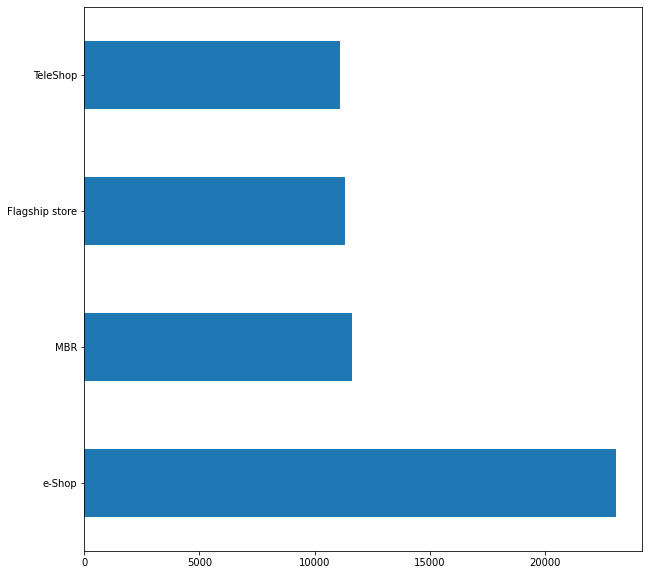

In [27]:
# Melihat store_type yang paling sering terjadi transaksi
df['Store_type'].value_counts().plot.barh(figsize=(10,10))

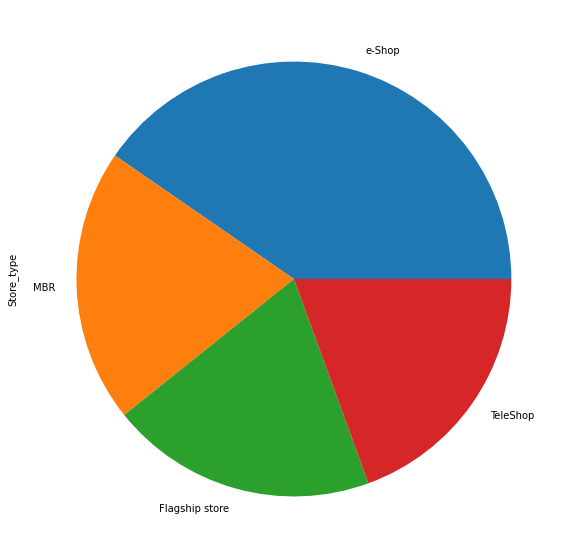

In [28]:
df['Store_type'].value_counts().plot.pie(figsize=(10,10))

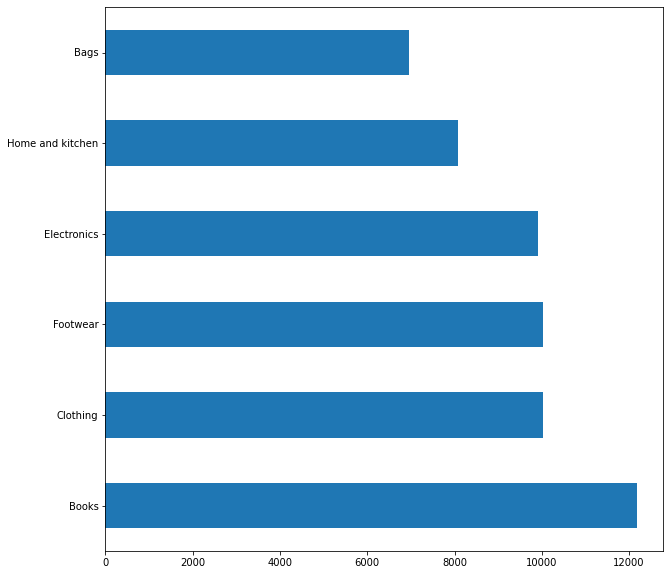

In [29]:
# Melihat prod_cat yang paling sering terjadi transaksi
df['prod_cat'].value_counts().plot.barh(figsize=(10,10))

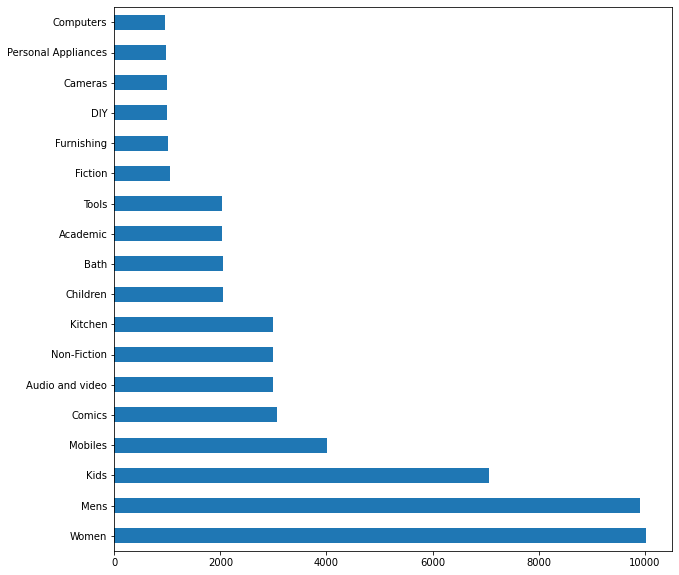

In [30]:
# Melihat prod_subcat yang paling sering terjadi transaksi
df['prod_subcat'].value_counts().plot.barh(figsize=(10,10))

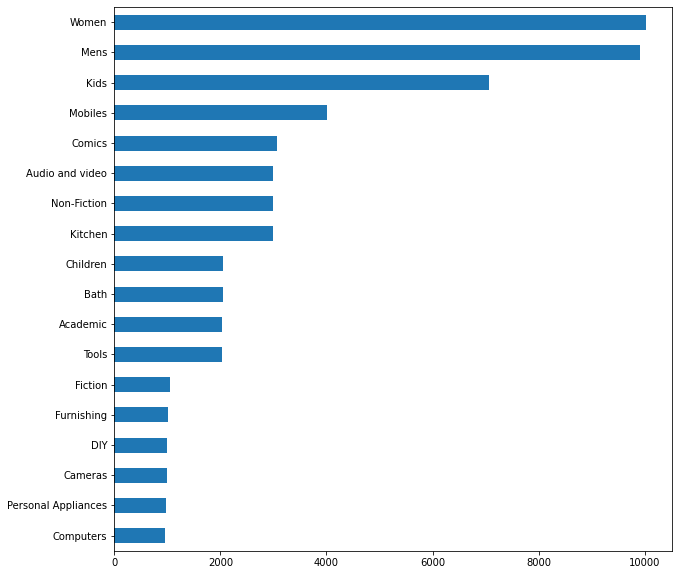

In [31]:
# Melihat prod_subcat yang paling sering terjadi transaksi (urutan dibalik)
df['prod_subcat'].value_counts().plot.barh(figsize=(10,10)).invert_yaxis()

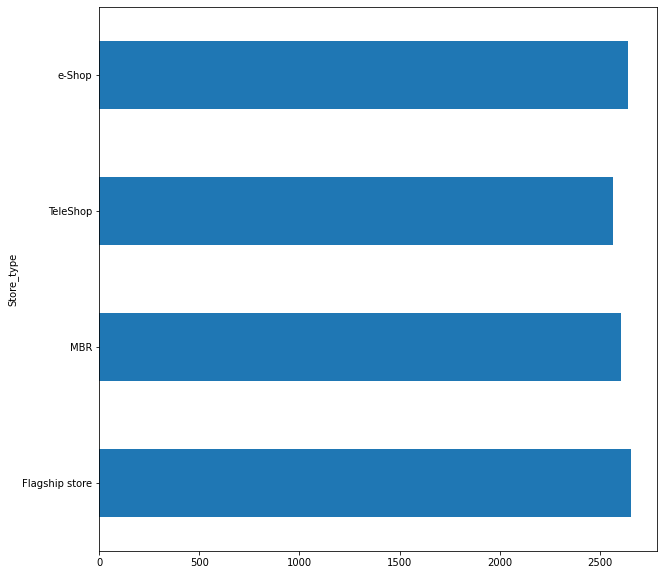

In [32]:
# Melihat rata-rata total amount dari setiap store_type
df.groupby('Store_type').total_amt.mean().plot.barh(figsize=(10,10))

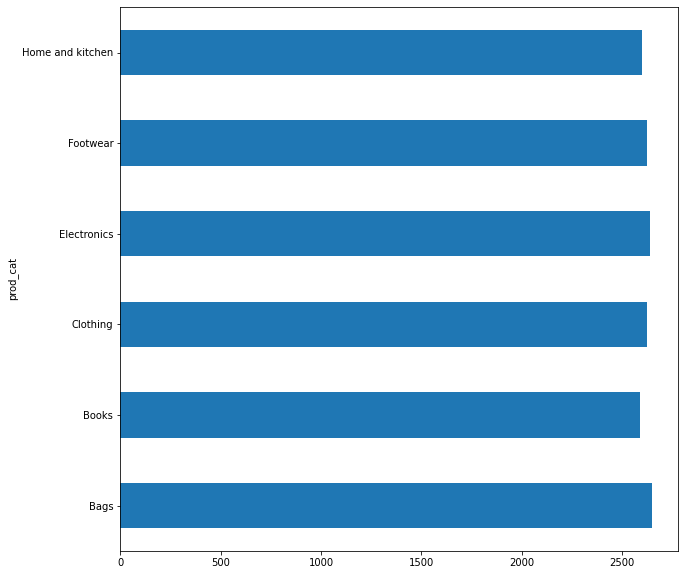

In [33]:
# Melihat rata-rata total amount dari setiap prod_cat
df.groupby('prod_cat').total_amt.mean().plot.barh(figsize=(10,10))

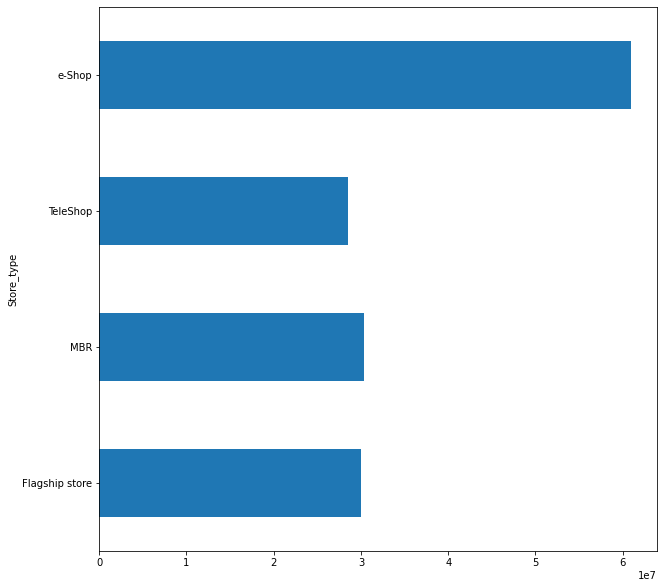

In [34]:
# Melihat total amount dari setiap store_type
df.groupby('Store_type').total_amt.sum().plot.barh(figsize=(10,10))

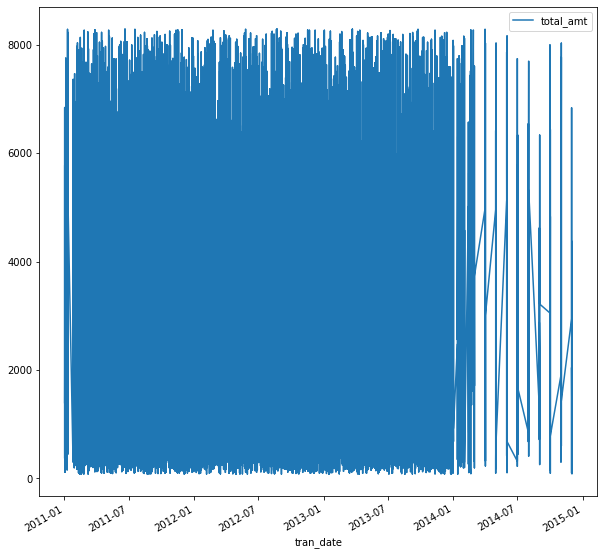

In [35]:
df.plot.line(x='tran_date',y='total_amt', figsize=(10,10))

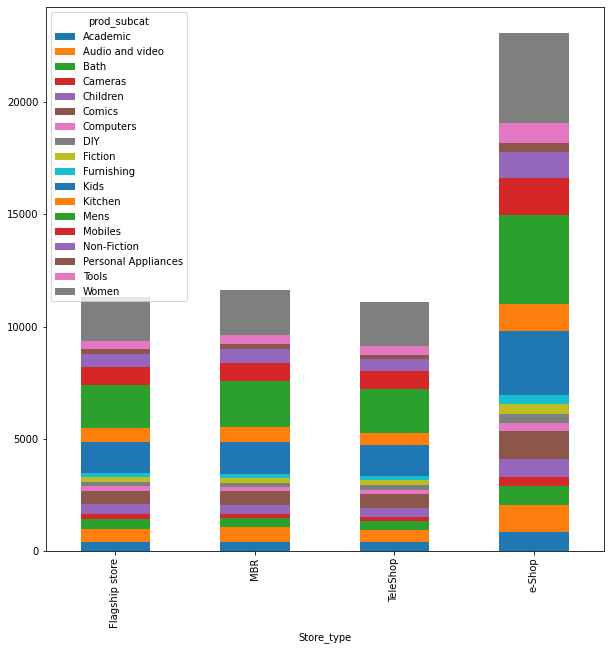

In [36]:
# Melihat sub katergori produk yang paling banyak dibeli di masing-masing store type
df.groupby('Store_type').prod_subcat.value_counts().unstack().plot.bar(figsize=(10,10),stacked=True)

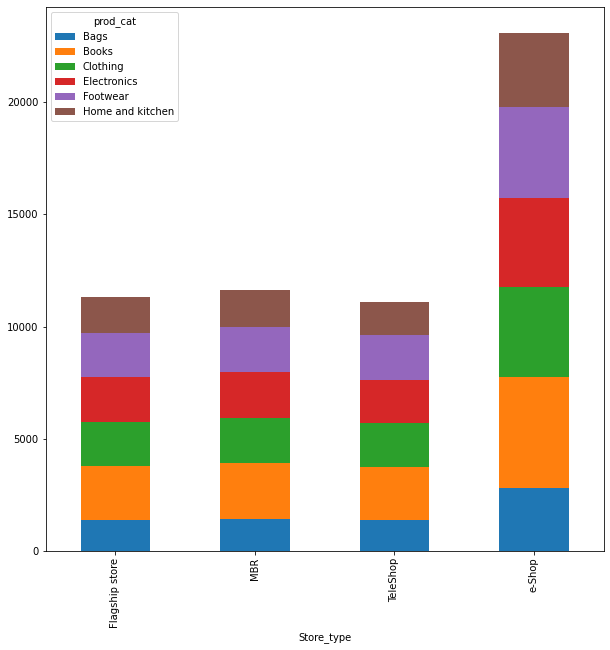

In [37]:
# Melihat katergori produk yang paling banyak dibeli di masing-masing store type
df.groupby('Store_type').prod_cat.value_counts().unstack().plot.bar(figsize=(10,10),stacked=True)

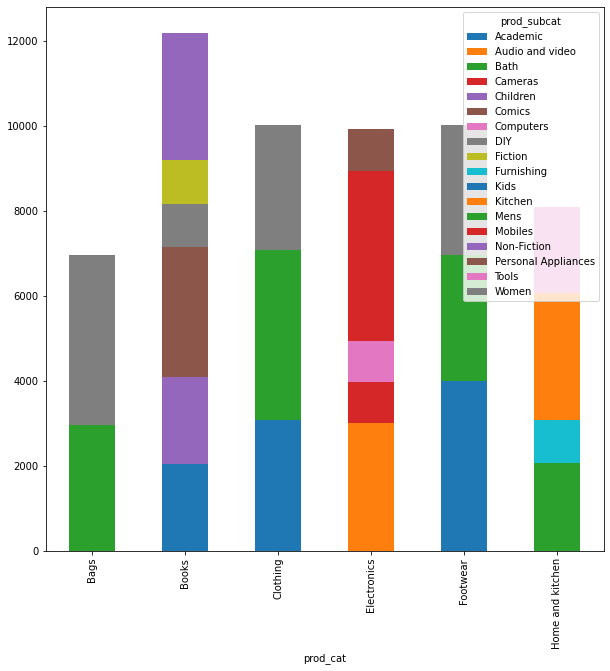

In [38]:
# Melihat jumlah transaksi per sub kategori dari setiap kategori
df.groupby('prod_cat').prod_subcat.value_counts().unstack().plot.bar(figsize=(10,10),stacked=True)

In [39]:
df2

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [40]:
df.groupby('Store_type').prod_subcat.value_counts()

Store_type      prod_subcat        
Flagship store  Women                  1955
                Mens                   1911
                Kids                   1403
                Mobiles                 807
                Audio and video         603
                                       ... 
e-Shop          Furnishing              415
                Personal Appliances     401
                DIY                     389
                Computers               382
                Cameras                 378
Name: prod_subcat, Length: 72, dtype: int64

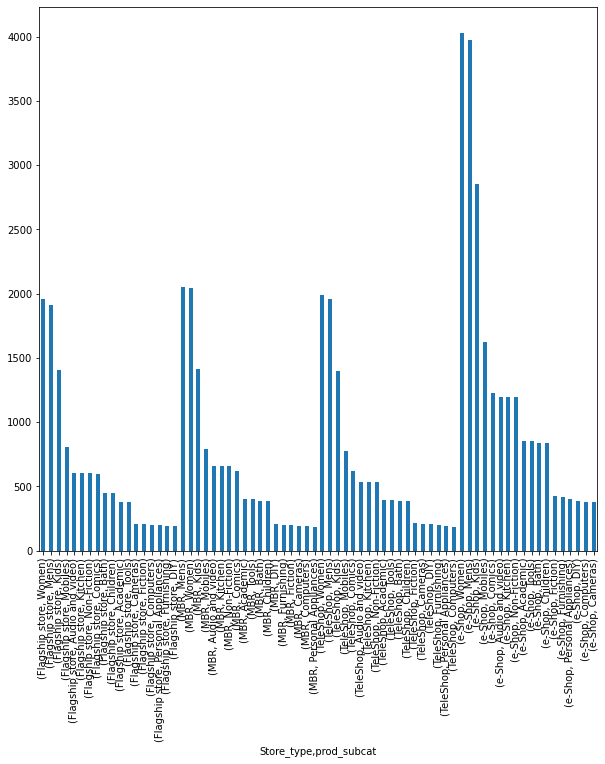

In [41]:
df.groupby('Store_type').prod_subcat.value_counts().plot.bar(figsize=(10,10),stacked=True)

In [42]:
# Filter data by subcat dengan value Mens dan Women
Women = df[df['prod_subcat']=='Women']
Mens = df[df['prod_subcat']=='Mens']

# Membuat tabel yang isinya hanya Women dan Mens
Women_Mens = pd.concat([Women,Mens])

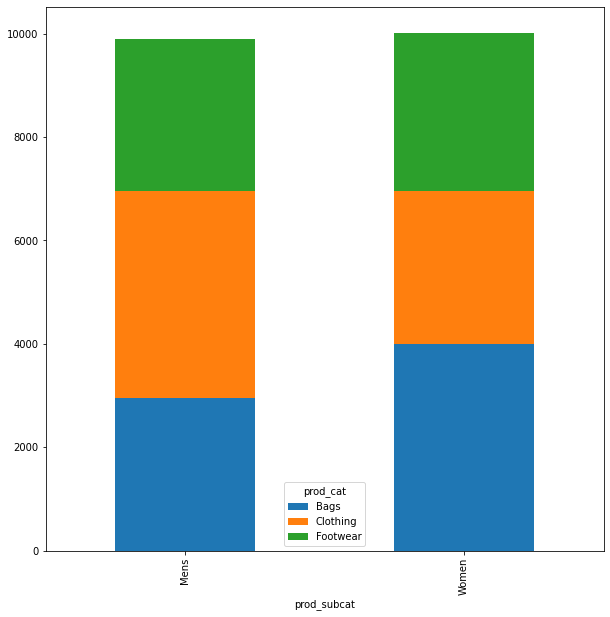

In [43]:
# Melihat jumlah transaksi dari sub kategori mens dan women berdasarkan kategorinya
Women_Mens.groupby('prod_subcat').prod_cat.value_counts().unstack().plot.bar(figsize=(10,10),stacked=True)

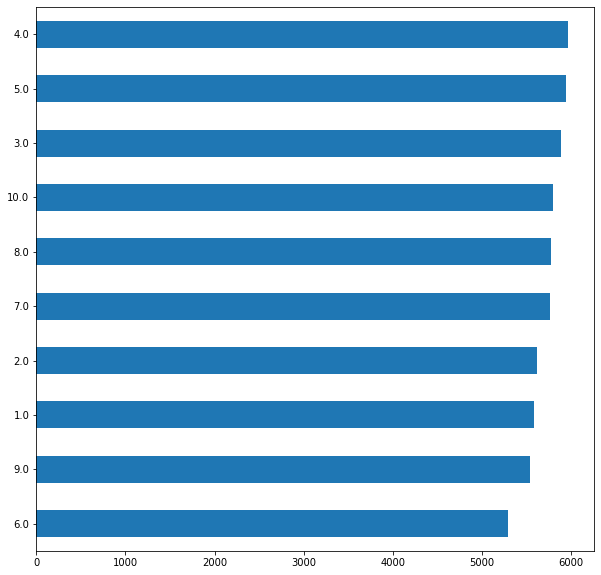

In [51]:
# melihat kota paling sering bertransaksi
df['city_code'].value_counts().plot.barh(figsize=(10,10)).invert_yaxis()

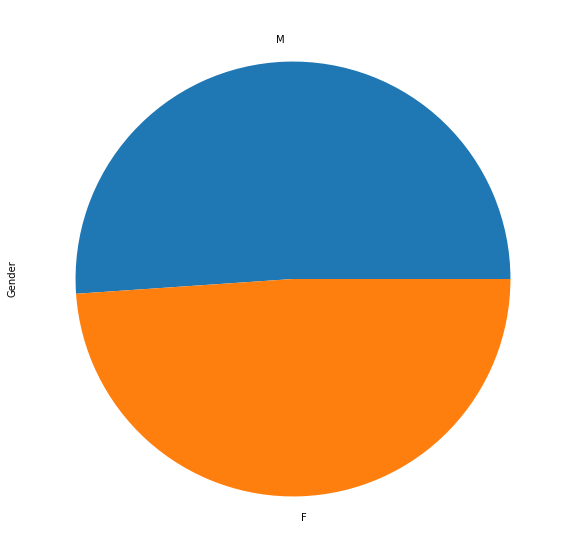

In [47]:
# Melihat Gender yang paling sering bertransaksi
df['Gender'].value_counts().plot.pie(figsize=(10,10))

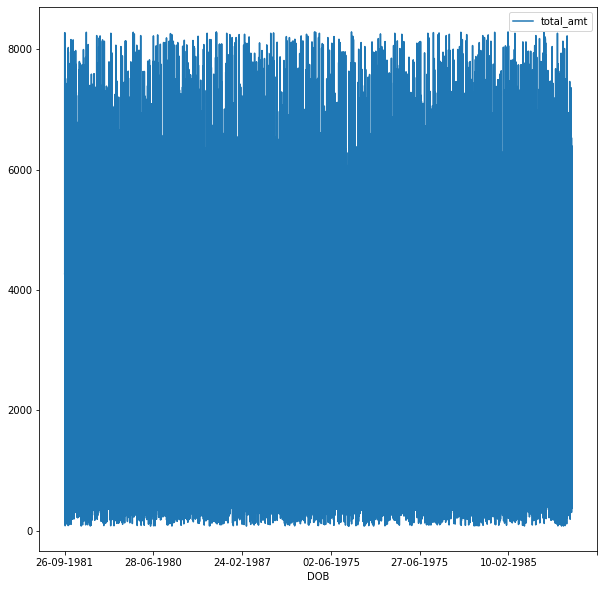

In [49]:
#melihat transaksi berdasarkan DOB atau tanggal lahir customer
df.plot.line(x='DOB',y='total_amt', figsize=(10,10))